In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [6]:
X=df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
print(X_scaled)

[[ 1.29153238 -1.13827979  0.27908825 ... -1.61909203  1.90288227
  -0.67917961]
 [-0.5389489  -0.47965843 -0.09701618 ...  0.64786643 -0.85997281
  -0.48562324]
 [-0.27283273 -0.09912164 -0.96607302 ...  0.67042323 -0.0384044
  -0.46537561]
 ...
 [-0.37231541  1.13030491  0.0088773  ...  0.28695762 -0.66120626
  -0.63775406]
 [ 0.44841668 -0.40647827 -0.59727159 ... -0.34463279  1.14094382
  -0.63775406]
 [ 1.11495062 -0.15034774 -0.33801514 ... -2.09278484  1.6246091
  -0.62954556]]


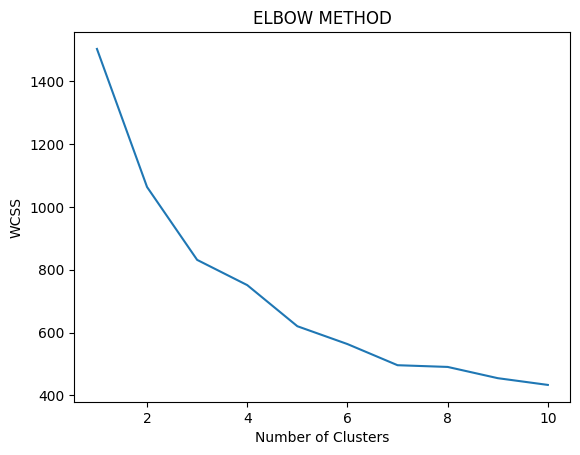

In [9]:
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3,random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [11]:
df['Cluster'] = labels

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


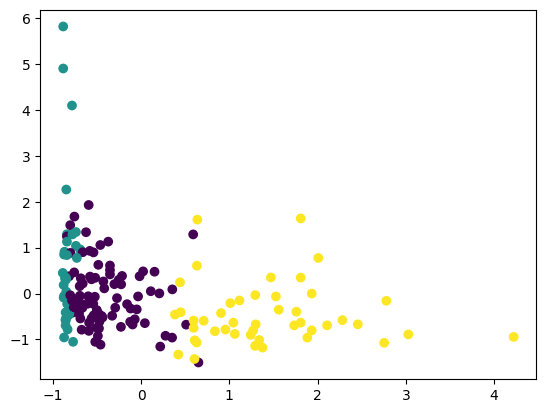

In [13]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=labels)
plt.show()

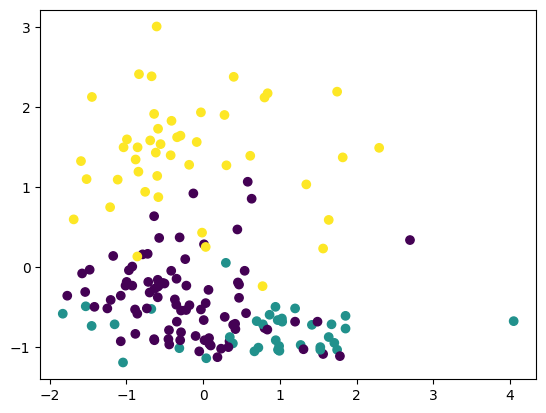

In [14]:
plt.scatter(X_scaled[:,2],X_scaled[:,7],c=labels)
plt.show()